
# Project: Investigate (Medical Appointment No Shows) Dataset


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This project is part of Udacity's Data Analyst Nanodegree (DAND). The objective of this project is to go through all phases of a typical data analysis project. The selected dataset to investigate is "Medical Appointment No Shows" availavle on Kaggle 
https://www.kaggle.com/joniarroba/noshowappointments
>
> The questions that will be addressed in this notebook are:
>
> 1) What is the No-show rate across all patients on the given dataset?
>
>2) Which gender is more likely to miss their medical appointments (males vs. females)?
>
>3) Which branch had the largest share of scheduled appointments?
>
>4) What is the age of the oldes patient across all branches?
>
>5) Which two features correlate the most?


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

> This section adresses the fundamental inspections applied on the dataset. First the dataset is loaded as a dataframe using the read_csv method. The first five entries are then displayed to have a better understanding on the data representation. The dataset has a dimention of (110527, 14). The info method is called to understand the types each feature is stored as i.e. int, folat, etc. The describe method was then called to obtain brief statistical insights on the dataset at hand. Prior to data cleaning, the entire dataset is inspected for dublicated and Null entries. In this case, neither dublicate entries nor Null value fields exist. 

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df= pd.read_csv('noshowappointments-kagglev2-may-2016.csv') # loading the dataset as a dataframe
df.head() # printing the first five enries in the dataset

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
print('Dataset dimension is: ' + str(df.shape)) #dataset dimension

Dataset dimension is: (110527, 14)


In [4]:
df.info() #understanding the features' types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.describe() # obtain brief statistical insights on the dataset at hand

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df.duplicated().any() #checking if the dataset has any dublicated entries 

False

In [7]:
df.isnull().any() #checking if the dataset has any Null entries 

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool



### Data Cleaning

> The dataset requires no cleaning as no missing values or dublicate entries exist. However, the first two features 'PatientId' and 'AppointmentID' make no difference in the exploratory analysis to answer the earlier posed questions and hence will be dropped from the data frame. Age entries with negative values have been dropped.

In [8]:
df= df[df['Age']>0] #deleting negative age entries

In [9]:
df= df.drop(['PatientId', 'AppointmentID'],axis=1) # dropping the 'PatientId', 'AppointmentID' features

In [10]:
df.head() # ensuring that the changes took place

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: What is the No-show rate across all patients on the given dataset?

In [11]:
#Looking up the number of No shows in the dataset

df['No-show'].value_counts()

No     85307
Yes    21680
Name: No-show, dtype: int64

In [12]:
# Calculating the percenteges of No-Show records 
appointments= df['No-show'].value_counts().tolist()
appointments[0], appointments[1]= appointments[0]/(appointments[0]+ appointments[1]), appointments[1]/(appointments[0]+ appointments[1])

appointments

[0.7973585575817622, 0.20264144241823773]

> 20.19% of the dataset scheduled appointments did not show up to their appointments while the remaing 79.81% showed up.

### Research Question 2: Which gender is more likely to miss their medical appointments (males vs. females)?

In [13]:
noShow_byGender= df.groupby(['Gender'])['No-show'].value_counts().astype('float')

noShow_byGender

Gender  No-show
F       No         55843.0
        Yes        14275.0
M       No         29464.0
        Yes         7405.0
Name: No-show, dtype: float64

In [14]:
# Function to average over the population
def averagingEntriesByPopulation(in_df):
    in_df[0],in_df[1] = in_df[0]/(in_df[0] + in_df[1]), in_df[1]/(in_df[0] + in_df[1])
    in_df[2],in_df[3] = in_df[2]/(in_df[2] + in_df[3]), in_df[3]/(in_df[2] + in_df[3])
    
    return in_df

#Averaging the no_show values by gender population

noShow_byGender= averagingEntriesByPopulation(noShow_byGender)
noShow_byGender

Gender  No-show
F       No         0.796415
        Yes        0.203585
M       No         0.799154
        Yes        0.200846
Name: No-show, dtype: float64

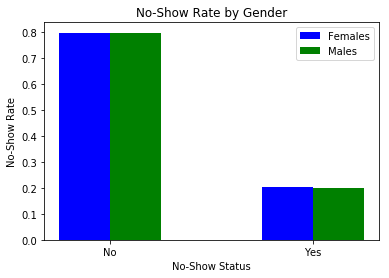

In [15]:
#Splitting the no show by gender
noShow_f= [noShow_byGender[0],noShow_byGender[1]]
noShow_m= [noShow_byGender[2],noShow_byGender[3]]

bars=np.arange(2)
status= ['No', 'Yes']

#plotting the results in a bar chart
bar_f= plt.bar(bars,noShow_f, 0.25, color='b', label= 'Females')
bar_m= plt.bar(bars+0.25,noShow_m, 0.25, color='g', label= 'Males')

plt.xlabel('No-Show Status')
plt.ylabel('No-Show Rate')
plt.title('No-Show Rate by Gender')
plt.xticks(bars+.25/2 ,status)
plt.legend()

> **Discussion:** As can be seen in the above bar chart, females have a slight higher chance of missing an appointment compared to males (0.203146 for females vs 0.199679 for males). These numbers were obtained by avereging the counts with the respective gender population.  

### Research Question 3: Which branch had the largest share of scheduled appointments?

In [16]:
# Obtaining the branch with the largest number of scheduled appointment
branches_appt=df['Neighbourhood'].value_counts().nlargest(n = 10)

branches_appt

JARDIM CAMBURI       7586
MARIA ORTIZ          5563
RESISTÊNCIA          4235
JARDIM DA PENHA      3851
ITARARÉ              3412
CENTRO               3282
SANTA MARTHA         3041
TABUAZEIRO           3019
JESUS DE NAZARETH    2719
BONFIM               2700
Name: Neighbourhood, dtype: int64

Text(0.5, 1.0, 'Appointments Distribution for the top 10 branches')

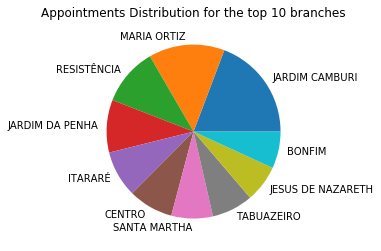

In [17]:
branches_appt.plot(kind='pie', label='')

plt.title('Appointments Distribution for the top 10 branches')

> **Discussion:** As can be seen above, Jardim Camburi branch has the highest total number of scheduled appointments (7717 appointments) compared with any other branch.

### Research Question 4: What is the age of the oldes patient across all branches?

In [18]:
df[df['Age']==df['Age'].max()]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
63912,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
97666,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


> **Discussion:** The oldest patients have an age of 115 years-old.

### Research Question 4: What is the age of the oldes patient across all branches?Which two features correlate the most?

In [19]:
df.corr() 

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
Age,1.000000,-0.112699,0.502091,0.290631,0.090391,0.074073,0.005251
Scholarship,-0.112699,1.000000,-0.024530,-0.027622,0.033527,-0.009890,-0.000010
Hipertension,0.502091,-0.024530,1.000000,0.430827,0.085459,0.078209,-0.008805
Diabetes,0.290631,-0.027622,0.430827,1.000000,0.016874,0.056377,-0.016136
Alcoholism,0.090391,0.033527,0.085459,0.016874,1.000000,0.003855,-0.027403
Handcap,0.074073,-0.009890,0.078209,0.056377,0.003855,1.000000,-0.025155
SMS_received,0.005251,-0.000010,-0.008805,-0.016136,-0.027403,-0.025155,1.000000


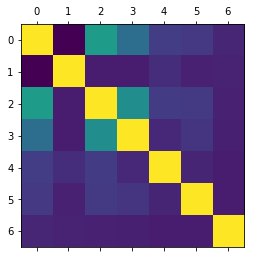

In [20]:
plt.matshow(df.corr()) #Plotting the correlation matrix

> **Discussion:** 'Age' and 'Hipertension' have the highest correlation coffiecient value of 0.502091.

<a id='conclusions'></a>
## Conclusions

> The dataset at hand has 110527 appointment entries for No-Show data analysis purposes. The dataset contained no missing or reapeted values which hence required no data cleaning to be carried out. Simple questions were raised at the begining of this notebook and they were answered as apporopriate. One potential limiting factor in this dataset is that it is taken only from one year i.e. 2016. More representative conclusions could have been drawn if the data had been sampled from different years.